In [4]:
import glob

In [5]:
import re

In [56]:
records = []
for filename in glob.glob("*.out"):
    d = {}
    with open(filename) as f:
        try:
            while "Simulation Timing Information:" not in next(f):
                pass
        except StopIteration:
            print(f"input file {filename} format wrong")
            break
        for i in range(4):
            k,v = next(f).split(":")
            k = k.strip()
            v = v.strip()
            d[k] = v

        while "Simulation Resource Information:" not in next(f):
            pass
        for i in range(13):
            k,v = next(f).split(":")
            k = k.strip()
            v = v.strip()
            d[k] = v
        for match in re.finditer("([a-zA-Z_]+)([0-9]+)", filename):
            k,v = match.groups()
            d[k] = v
    records.append(d)


In [57]:
len(records)

64

In [58]:
import pandas as pd

In [59]:
df = pd.DataFrame.from_records(records)

In [60]:
df

,Build time,Simulation time,Total time,Simulated time,Max Resident Set Size,Approx. Global Max RSS Size,Max Local Page Faults,Global Page Faults,Max Output Blocks,Max Input Blocks,Max mempool usage,Global mempool usage,Global active activities,Current global TimeVortex depth,Max TimeVortex depth,Max Sync data size,Global Sync data size,memory_mb,copy_mb
0,0.139350 seconds,1480.297149 seconds,1480.436590 seconds,176.146 ms,332.12 MB,332.12 MB,0 faults,0 faults,0 blocks,0 blocks,204.617 MB,204.617 MB,2097159 activities,6 entries,17 entries,0 B,0 B,96,32
1,0.139659 seconds,4564.176592 seconds,4564.316342 seconds,528.468 ms,823.58 MB,823.58 MB,0 faults,0 faults,0 blocks,0 blocks,573.715 MB,573.715 MB,6291463 activities,6 entries,17 entries,0 B,0 B,160,96
2,0.139653 seconds,9421.627609 seconds,9421.767353 seconds,1.05695 s,1.56096 GB,1.56096 GB,0 faults,0 faults,0 blocks,0 blocks,1.12736 GB,1.12736 GB,12582919 activities,6 entries,17 entries,0 B,0 B,64,192
3,0.140271 seconds,12475.424247 seconds,12475.564607 seconds,1.40927 s,2.05203 GB,2.05203 GB,0 faults,0 faults,0 blocks,0 blocks,1.49646 GB,1.49646 GB,16777223 activities,6 entries,17 entries,0 B,0 B,192,256
4,0.140041 seconds,6142.734265 seconds,6142.874401 seconds,704.628 ms,1.06934 GB,1.06934 GB,0 faults,0 faults,0 blocks,0 blocks,758.264 MB,758.264 MB,8388615 activities,6 entries,17 entries,0 B,0 B,64,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.140016 seconds,4592.194714 seconds,4592.334816 seconds,528.468 ms,823.616 MB,823.616 MB,0 faults,0 faults,0 blocks,0 blocks,573.715 MB,573.715 MB,6291463 activities,6 entries,17 entries,0 B,0 B,128,96
60,0.137907 seconds,1505.909272 seconds,1506.047274 seconds,176.146 ms,332.472 MB,332.472 MB,0 faults,0 faults,0 blocks,0 blocks,204.617 MB,204.617 MB,2097159 activities,6 entries,17 entries,0 B,0 B,256,32
61,0.140278 seconds,3033.813953 seconds,3033.954318 seconds,352.307 ms,578 MB,578 MB,0 faults,0 faults,0 blocks,0 blocks,389.166 MB,389.166 MB,4194311 activities,6 entries,17 entries,0 B,0 B,160,64
62,0.139661 seconds,1489.865866 seconds,1490.005624 seconds,176.146 ms,332.072 MB,332.072 MB,0 faults,0 faults,0 blocks,0 blocks,204.617 MB,204.617 MB,2097159 activities,6 entries,17 entries,0 B,0 B,64,32


In [63]:
import humanfriendly

In [64]:
df["Max Resident Set Size"] = list(map(humanfriendly.parse_size, df["Max Resident Set Size"]))
df["Max Resident Set Size"]

0      332120000
1      823580000
2     1560960000
3     2052029999
4     1069340000
         ...    
59     823616000
60     332472000
61     578000000
62     332072000
63     332044000
Name: Max Resident Set Size, Length: 64, dtype: int64

In [65]:
import plotly

In [66]:
plotly.offline.init_notebook_mode(connected=True)

In [67]:
import plotly

In [68]:
df.sort_values(["memory_mb", "copy_mb"])

,Build time,Simulation time,Total time,Simulated time,Max Resident Set Size,Approx. Global Max RSS Size,Max Local Page Faults,Global Page Faults,Max Output Blocks,Max Input Blocks,Max mempool usage,Global mempool usage,Global active activities,Current global TimeVortex depth,Max TimeVortex depth,Max Sync data size,Global Sync data size,memory_mb,copy_mb
43,0.139696 seconds,6109.340784 seconds,6109.480570 seconds,704.628 ms,1069340000,1.06934 GB,0 faults,0 faults,0 blocks,0 blocks,758.264 MB,758.264 MB,8388615 activities,6 entries,17 entries,0 B,0 B,128,128
36,0.138555 seconds,7776.694341 seconds,7776.832989 seconds,880.789 ms,1315240000,1.31524 GB,0 faults,0 faults,0 blocks,0 blocks,942.813 MB,942.813 MB,10485767 activities,6 entries,17 entries,0 B,0 B,128,160
39,0.138884 seconds,9289.771804 seconds,9289.910778 seconds,1.05695 s,1560910000,1.56091 GB,0 faults,0 faults,0 blocks,0 blocks,1.12736 GB,1.12736 GB,12582919 activities,6 entries,17 entries,0 B,0 B,128,192
57,0.137979 seconds,10878.316899 seconds,10878.454963 seconds,1.23311 s,1806510000,1.80651 GB,0 faults,0 faults,0 blocks,0 blocks,1.31191 GB,1.31191 GB,14680071 activities,6 entries,17 entries,0 B,0 B,128,224
45,0.138264 seconds,12513.001766 seconds,12513.140117 seconds,1.40927 s,2052280000,2.05228 GB,0 faults,0 faults,0 blocks,0 blocks,1.49646 GB,1.49646 GB,16777223 activities,6 entries,17 entries,0 B,0 B,128,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.139826 seconds,11080.557749 seconds,11080.697664 seconds,1.23311 s,1807010000,1.80701 GB,0 faults,0 faults,0 blocks,0 blocks,1.31191 GB,1.31191 GB,14680071 activities,6 entries,17 entries,0 B,0 B,96,224
9,0.140440 seconds,12543.931682 seconds,12544.072209 seconds,1.40927 s,2052290000,2.05229 GB,0 faults,0 faults,0 blocks,0 blocks,1.49646 GB,1.49646 GB,16777223 activities,6 entries,17 entries,0 B,0 B,96,256
0,0.139350 seconds,1480.297149 seconds,1480.436590 seconds,176.146 ms,332120000,332.12 MB,0 faults,0 faults,0 blocks,0 blocks,204.617 MB,204.617 MB,2097159 activities,6 entries,17 entries,0 B,0 B,96,32
15,0.139974 seconds,3034.106463 seconds,3034.246526 seconds,352.307 ms,578056000,578.056 MB,0 faults,0 faults,0 blocks,0 blocks,389.166 MB,389.166 MB,4194311 activities,6 entries,17 entries,0 B,0 B,96,64


In [70]:
df["Simulation time"] = pd.to_timedelta(df["Simulation time"])

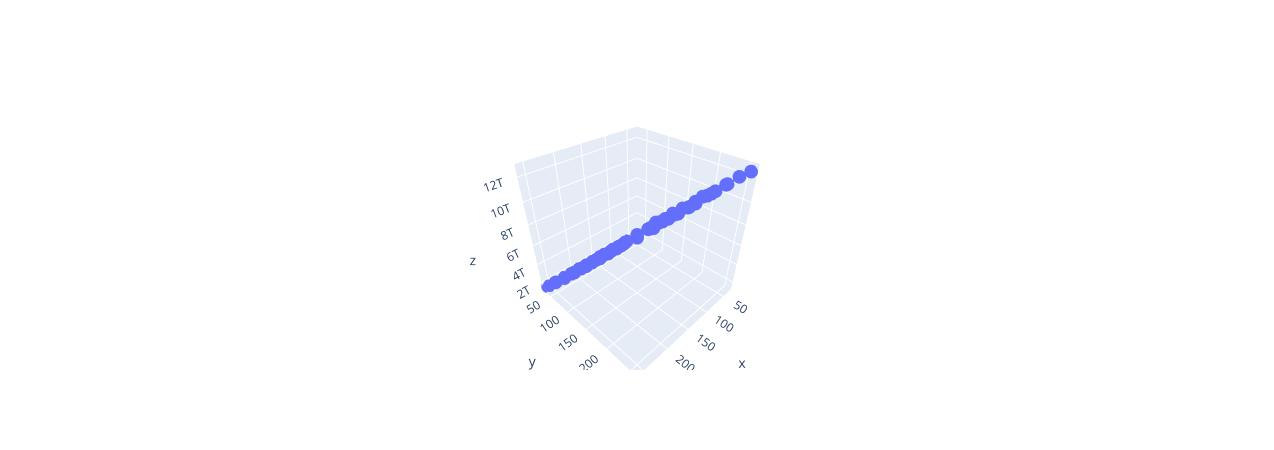

In [72]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
# z = z_data.values
# sh_0, sh_1 = z.shape
# x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
# fig = go.Figure(data=[go.Surface(z=df["Simulation time"], x=df["memory_mb"], y=df["copy_mb"])])
fig = go.Figure(data=[go.Scatter3d(z=df["Simulation time"], x=df["memory_mb"], y=df["copy_mb"])])
# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
plotly.offline.iplot(fig)

In [74]:
df.columns

Index(['Build time', 'Simulation time', 'Total time', 'Simulated time',
       'Max Resident Set Size', 'Approx. Global Max RSS Size',
       'Max Local Page Faults', 'Global Page Faults', 'Max Output Blocks',
       'Max Input Blocks', 'Max mempool usage', 'Global mempool usage',
       'Global active activities', 'Current global TimeVortex depth',
       'Max TimeVortex depth', 'Max Sync data size', 'Global Sync data size',
       'memory_mb', 'copy_mb'],
      dtype='object')

In [77]:
import plotly_express as px

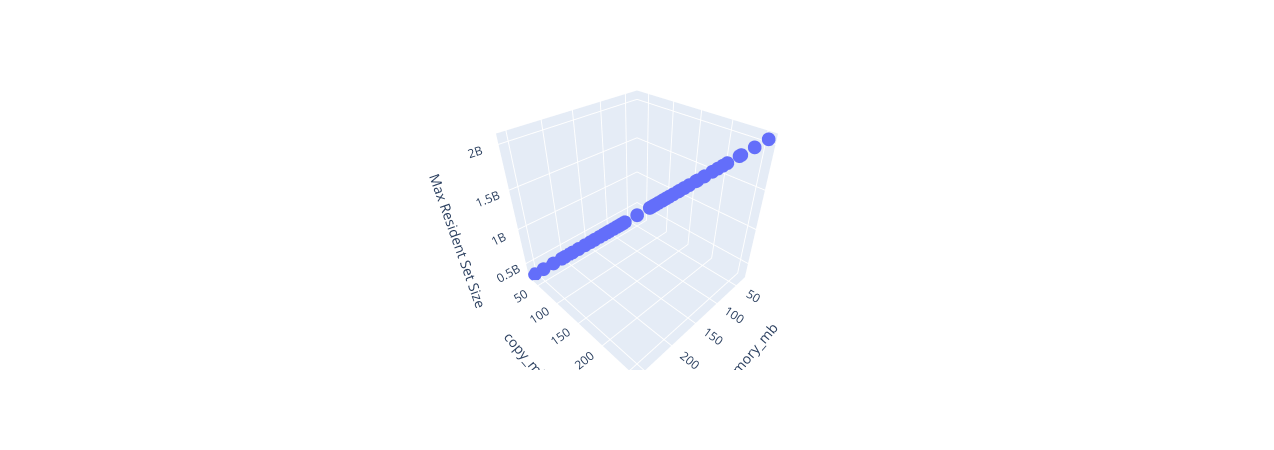

In [78]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
# z = z_data.values
# sh_0, sh_1 = z.shape
# x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
# fig = go.Figure(data=[go.Surface(z=df["Simulation time"], x=df["memory_mb"], y=df["copy_mb"])])
# fig = go.Figure(data=[go.Scatter3d(z=df["Max Resident Set Size"], x=df["memory_mb"], y=df["copy_mb"], xlabel="hi")])
fig = px.scatter_3d(df, x = "memory_mb", y="copy_mb", z="Max Resident Set Size")
# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
plotly.offline.iplot(fig)

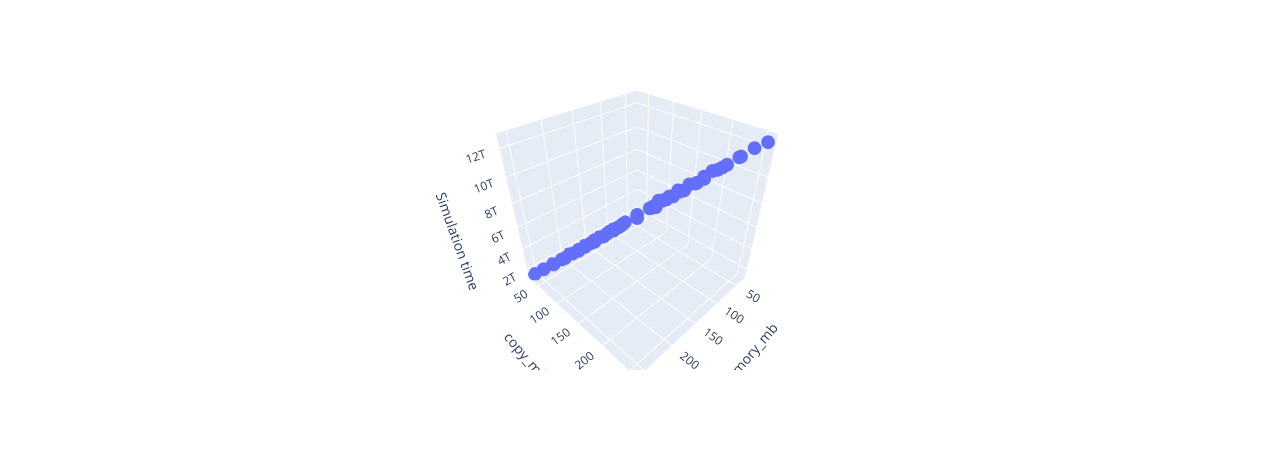

In [79]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
# z = z_data.values
# sh_0, sh_1 = z.shape
# x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
# fig = go.Figure(data=[go.Surface(z=df["Simulation time"], x=df["memory_mb"], y=df["copy_mb"])])
# fig = go.Figure(data=[go.Scatter3d(z=df["Max Resident Set Size"], x=df["memory_mb"], y=df["copy_mb"], xlabel="hi")])
fig = px.scatter_3d(df, x = "memory_mb", y="copy_mb", z="Simulation time")
# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
plotly.offline.iplot(fig)